[View in Colaboratory](https://colab.research.google.com/github/SurajDonthi/Article-Tutorials/blob/master/Introduction_Neural_Networks_for_Absolute_beginners.ipynb)

# Implementing Neural Networks with Numpy for Absolute Beginners - Part 1 (Linear Regression)

##### In this tutorial, you will get a brief understanding of what Neural Networks are and how they have been developed. At the end of this course, you will be able to build a simple predictor from an artificial neuron.

The field of Artificial Intelligence has gained a lot of popularity and momentum during the past 10 years, largely due to a huge increase in the computational capacity of computers with the use of GPUs. Especially Deep Learning, which has become the buzzword everywhere. Another reason is the scale in which data has become available exponentially during this period.

Artificial intelligence is where a machine learns on it's own to recognise patterns such as identifying objects and beings like cats, dogs, tables, people etc., and many more such patterns. 
There are 3 types of problems that we can encounter in this domain:
1. When a lot of data is available and you know both the input data and the output data. Here, you can train the model based on the given set of input-output data and ask the model to predict the output for a new set of data. This type of learning is called **Supervised Learning** (Since, you are giving the input and also mentioning that this is the correct output for the data).
<br><br>
Supervised Learning can be further divided into the two tasks as below:
<br>
> a. Classifcation - where you predict that the data belongs to a specific class. Eg.: Classfying a cat or a dog.
<br>
> b. Regression - where a real number value is predicted. Eg: Predicting the price of a house given it's dimensions.
<br>

>In the below example, we can see that images are trained against their labels. We test model by inputting an image and predicting it's class... like a cat.
>>>>> <img src="http://androidkt.com/wp-content/uploads/2017/07/neural-network.gif" alt="Add figure" width="550"/>

> 2\. When you only have the input data and want the algorithm to figure out by itself the patterns in the input data, it is called **Unsupervised Learning**. <br><br>In the example shown below, we only provide the datapoints and the number clusters(classes) that has to be formed and let the algorithm find out the best set of clusters.
>>>>>>> <img src="https://sandipanweb.files.wordpress.com/2016/08/kevalc1.gif?w=676" alt="Add figure" width="350"/>

> 3\. The last one is where there is no data, but there is a learning agent that is put in a predefined environment and made to learn by the actions it takes. It is either rewarded or punished based on it's actions. This is the most interesting kind of learning and is also where a lot of exploration and research is happenning.It is called **Reinforcement Learning**.<br><br>As it can clearly be seen from the below image that the agent which is modelled as a person, learns to climb the wall through trial and error.
>>>>>>> <img src="https://storage.googleapis.com/deepmind-live-cms-alt/documents/ezgif.com-resize.gif" alt="Add figure" width="400"/>

<br><br>In this tutorial we'll explore supervised learning through Neural Networks.

## A little bit into the history of how Neural Networks evolved

The evolution of AI dates to back to 1950 when Alan Turing, the computer genius, came out with the Turing Test to distinguish between a Human and a Robot. He describes that when a machine performs so well, that we(humans) are not able to distinguish between the response given by a human and a machine, it has passed the Turing Test. Apparently this feat was achieved only in 2012, when a company named Vicarious cracked the captchas. Check out this video below on how Vicarious broke the captchas.

In [0]:
#@title Vicarious Video
%%HTML

<iframe src="https://player.vimeo.com/video/77431982?title=0&byline=0&portrait=0" width="640" height="360" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>

It must be noted that most of the Algorithms that were developed during that period(1950-2000) and now existing, are highly inspired by the working of our brain, the neurons and their structure with how they learn and transfer data. The most popular works include the Perceptron and the Neocognitron $-$(not covered in this article, but in a future article) based on which the Neural Networks have been developed. 

Now, before we dive into what a perceptron is,  let's make sure we know a bit of all these... Although not necessarily required!

## Prerequisites

What youâ€™ll need to know for the course:
1.   A little bit of Python, Numpy and Matplotlib
2.   A little bit of Math &
3.   the eagerness to learn Neural Networks

If you are unsure of which environment to use for implementing this, I recommend [Google Colab](https://colab.research.google.com/). The environment comes with many important packages already installed. Installing new packages and also importing and exporting the data is quite simple. Most of all, it also comes with GPU support. So go ahead and get coding with the platform!

Lastly, this article is directed for those who want to learn about Neural Networks or just Linear Regression. However, there would be an inclination towards Neural Networks!

## A biological Neuron

>>>>> ![Comparison of a Neuron Cell and a Perceptron](https://docs.google.com/drawings/d/e/2PACX-1vSivgdRoiDD8I1uBa1pUk9uALPbsE4LyoSVJpJkxLbT3DqTN-UwAcn4La9jmADG2u-8Ul5dZmDpwVtw/pub?w=3842&h=1698)

The figure above shows a biological neuron. It has *dendrites* that recieve information from neurons. The recieved information is passed on to the *cell body or the nucleus* of the neuron. The *nucleus* is where the information is processed. The processed information is passed on to the next layer of neurons through the *axons*.

Our brain consists of about 100 billion such neurons which communicate through electrochemical signals. Each neuron is connected to 100s and 1000s of other neurons which constantly transmit and recieve signals. When the sum of the signals recieved by a neuron exceeds a set threshold value, the cell is activated (although, it has been speculated that neurons use very complex activations to process the input data) and the signal is further transmitted to other neurons. We'll see that the artificial neuron or the perceptron adopts the same ideology to perform computation and transmit data in the next section.

We know that different regions of our brain are activated (/receptive) for different actions like seeing, hearing, creative thinking and so on. This is because the neurons belonging to a specific region in the brain are trained to process a certain kind of information better and hence get activated when only certain kinds of information is being sent.The figure below gives us a better understanding of the different receptive regions of the brain.

>>>> ![Different receptive regions of the brain](http://www.md-health.com/images/brain-regions-areas.gif)

It has also been shown through the concept of Neuroplasticity that the different regions of the brain can be rewired to perform totally different tasks. Such as the neurons responsible for touch sensing can be rewired to become sensitive to smell. Check out this great TEDx video below to know more about neuroplasticity.

Similarly, an artificial neuron/perceptron can be trained to recognize some of the most comlplex pattern. Hence, they can be called Universal Function Approximators.

In the next section, we'll explore the working of a perceptron and also gain a mathematical intuition.

In [0]:
#@title Neuroplasticity
%%HTML

'<iframe width="854" height="480" src="https://www.youtube.com/embed/xzbHtIrb14s" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>'

## Perceptron

>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vQi5UtWOScAOVixzrE42U59N2o6ruP8_LgHlTF8fSQH4glqZa6AsbkNxmwWAsYKdcjBmUQSyG5zFCod/pub?w=3720&h=2884" alt="Drawing" width="500"/>


From the figure, we observe that the perceptron is a reflection of the biological neuron. The inputs combined with the weights($w_i$) are analogous to dendrties. These values are summed and passed through an activation function (like the thresholding function as shown in fig.). This is analogous to the nucleus. Finally, the activated value is transmitted to the next neuron/perceptron which is analogous to the axons.

The latent weights($w_i$) multiplied with each input($x_i$) depicts the significance of the respective input/feature. Larger the value of a weight, more important is the feature. Hence, the weights are what is learned in a perceptron so as to arrive at the required result. An additional bias($b$, here $w_0$) is also learned.

Hence, when there are multiple inputs (say n), the equation can be generalized as follows: 
\begin{equation}
z=w_0+w_1.x_1+w_2.x_2+w_3.x_3+......+w_n.x_n \\
\therefore z=\sum_{i=0}^{n}w_i.x_i \qquad \text{where } x_0 = 1
\end{equation}

Finally, the output of summation (assume as $z$) is fed to the *thresholding activation function*, where the function outputs $ -1 \space \text{if } z < 0 \space \& \space 1 \space \text{if } z \geq 0$.

### An Example

Let us consider our perceptron to perform as *logic gates* to gain more intuition.

Let's choose an $AND \space gate$. The Truth Table for the $AND \space gate$ is shown below:

>>>>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vTBFWuo0jZqGST_0f-zn_oX9u5zmrFQTXDlAu3SZsiOGycQpshBS1HzyxyNJj5iJ7d3AprYyKzjPfYa/pub?w=1441&h=847" alt="Drawing" width="250"/>

The perceptron for the $AND \space gate$ can be formed as shown in the figure. It is clear that the perceptron has two inputs (here $x1=A$ and $x2=B$)

>>>>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vQW2pQ4tL-XVZ09z_dkHiSmrS9-rkoQe7NZz3JMQ1ybErrA9zpDyWIZZVdKhfYhFmbEk3YpPAlT7hx5/pub?w=2783&h=1836" alt="AND Gate" width="300"/>

\begin{equation}
\text{Threshold Function,} \qquad y = f(z) = \begin{cases}
1,& \text{if }z \geq 0.5\\
0,& \text{if } z< 0.5\\
\end{cases}
\end{equation}

We can see that for inputs $x1$, $x2$ & $x_0=1$, setting their weights as 
\begin{equation}
w_0=-0.5, \\
w_1=0.6, \space \&\\
w_2=0.6
\end{equation}
respectively and keeping the *Threshold function* as the activation function we can arrive at the $AND \space Gate$.

Now, let's get our hands dirty and codify this and test it out!

In [0]:
def and_perceptron(x1, x2):
    
    w0 = -0.5
    w1 = 0.6
    w2 = 0.6
    
    z = w0 + w1 * x1 + w2 * x2
    
    thresh = lambda x: 1 if x>= 0.5 else 0

    r = thresh(z)
    print(r)

In [0]:
and_perceptron(1, 1)

1


Similarly for $NOR \space Gate$ the Truth Table is,

>>>>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vSdobJruUXwaSoQ6y9IscvyZEfBEY7xyE8pGZXtfVF8ADgTUdPuOWEBKKEWhCUJ2MokyJqEM_bkxiz9/pub?w=1438&h=809" alt="Drawing" width="250"/>

The perceptron for $NOR \space Gate$ will be as below:

>>>>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vTe0faigDdNNxjlSuc8gBZVY6M5Ew9Mp_F_U_xWVWwsW-KDbJ--8Fq2lUfxT5tYdOukT0Fkv91aXSXh/pub?w=2772&h=1834" alt="AND Gate" width="300"/>


We can set the weights as
\begin{equation}
w_0 = 0.5 \\
w_1 = -0.6 \\
w_2 = -0.6
\end{equation}
so that we obtain a $NOR \space Gate$.

You can go ahead and implement this in code.

In [0]:
def nor_perceptron(x1, x2):
    
    w0 = 0.5
    w1 = -0.6
    w2 = -0.6
    
    z = w0 + w1 * x1 + w2 * x2
    
    thresh = lambda x: 1 if x>= 0.5 else 0

    r = thresh(z)
    print(r)

In [0]:
nor_perceptron(1, 1)

0


Here, is the Truth Table for $NAND \space Gate$. Go ahead and guess the weights that fits the function and also implement in code.

>>>>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vTZtYQeTz7QELabtZ7-zzrGlXi-p-L6dwF9FZl4x9So6hfxCxdNC4ANhCELmnVDix-38PlIOlPLqhul/pub?w=1440&h=915" alt="Drawing" width="250"/>

In [0]:
# Add your code here

## Linear Activation Function

Lets assume that there is only one input and bias to the perceptron as shown below:

>>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vQ0sj3f-bHdNDVltSyUEHQqccTNxA9zWCeskyI5pdpbyoWmYODkGc_J_T_8PYdhvUZ5jUJG-XhuU8-D/pub?w=2800&h=2168" alt="Drawing" width="600"/>

The resulting linear output(i.e., the sum) will be $z = m.x + b$. This is the equation of a straight line, as shown in the below figure. 

>>>>>>>>> <img src="http://mathonweb.com/help_ebook/html/equations_1/eqs21.gif" alt="Drawing" width="300"/>

*It must be noted here that when no activation function is used, we can say that the acitvation function is linear.*

**This is a multivariate(multiple variables) linear equation.**

Let us see how this is utilized for predicting the actual output of $y$ in the next section i.e., ***Linear Regression***.

## Linear Regression

Fitting a linear equation on a given set of data in $n$-dimensional space is called **Linear Regression**. The image below shows an example of Linear Regression. 

>>>>>> <img src="https://cdn-images-1.medium.com/max/1600/1*eeIvlwkMNG1wSmj3FR6M2g.gif" alt="Drawing" width="500"/>

In simple words, we try to find the best values of $m(w_1)$ and $b(w_0)$ that best fits the set of points as shown in the above figure. When we have obtained the best possible fit, we can predict the y values given x.

A very popular example is the *housing price prediction* problem. In this problem we are given a set of values like the area of the house and the number of rooms etc. We predict the price of the house given these values.

So the big question is... How does the prediction algorithm work? How does it learn to predict?



Let's learn this on the go!

Let's start importing the required packages.

In [0]:
# Numpy for efficient Matrix and mathematical operations.
import numpy as np

# Pandas for table and other related operations
import pandas as pd

# Matplotlib for visualizing graphs
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# Sklearn for creating a dataset
from sklearn.datasets import make_regression

# train_test_split for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

% matplotlib inline

# Set parameters for plotting
params = {'axes.titlesize': 'xx-large',
          'axes.labelsize': 'x-large',
          'figure.figsize': (8, 6)
}

rcParams.update(params)

We use the sklearn dataset generator for creating our dataset. We shall also the sklearn package for splitting the data into training and test data.

For creating the dataset, we must first set a list of hyperparameters $-$ while $m$ and $b$ are parameters, the number of samples, the number of input features, the number of neurons, the learning rate, the number of iterations/epochs for training etc. are called hyperparameters. We shall learn about these hyperparameters as we implement the algorithm.

For now, we shall set the number of training samples, the number of input features, the learning rate and epochs. We shall understand learning rate and epochs in a short while.

In [0]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 51

Generate the sample data

In [0]:
X, y = make_regression(n_samples=M, n_features=n, n_informative=n, 
                             n_targets=1, random_state=42, noise=10)

In [0]:
def plot_graph(X, y):
    
    # Plot the original set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)
    
    _ = plt.title('Plot of Datapoints generated')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

    plt.show()

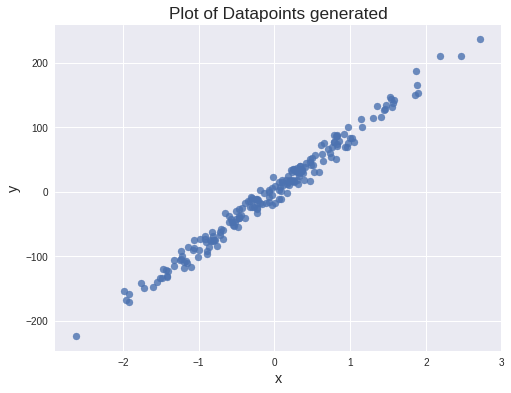

In [83]:
plot_graph(X, y)

Now let's split the data into train set and test set. We shall also reset the sizes so there is no discrepency in doing matrix computations.

In [0]:
def reset_sizes(*args):
     
    return tuple(arg.reshape((arg.shape[0], 1)) for arg in args)

In [12]:
X, y = reset_sizes(X, y)
X.shape

(200, 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's check the shape of the Train and Test datasets created.

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


The next step is to randomly generate a line with a random slope and an intercept(bias)

In [0]:
def init_params():
    
    m = np.random.normal(scale=10)
    b = np.random.normal(scale=10)

#     print('m = ', m)
#     print('b = ', b)
    
    return m, b

In [0]:
m, b = init_params()

Now, given $m$ & $b$, we can plot the line so generated.

Let's update the function ```plot_graph``` to show the predicted line too.

In [0]:
def plot_graph(dataset, pred_line=None):
    
    X, y = dataset['X'], dataset['y']
    
    _ = plt.scatter(X, y, alpha=0.8)                                # Plot the set of datapoints
    
    if(pred_line != None):
        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        _ = plt.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        _ = plt.title('Random Line on set of Datapoints')
    
    else:
        _ = plt.title('Plot of Datapoints')
   
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

    plt.show()

In [0]:
def plot_pred_line(X, y, m, b):
    
    # Generate a set of datapoints on x for creating a line.
    x_line = np.linspace(np.min(X), np.max(X), 10)

    # Calculate the corresponding y with random values of m & b
    y_line = m * x_line + b
    
    dataset = {'X': X, 'y': y}
    
    pred_line = {'x_line': x_line, 'y_line':y_line}
    
    plot_graph(dataset, pred_line)
    
    return 

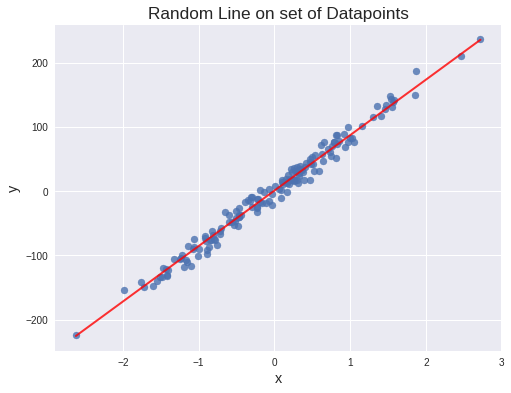

In [88]:
plot_pred_line(X_train, y_train, m, b)

Let us predict the values of $y(y_{pred})$ from the parameters $m$ & $b$ given the datapoints $X_{train}$ by defining a function ```forward_prop```

In [0]:
def forward_prop(X, m, b):
    
    y_pred = m * X + b
    
    return y_pred

In [0]:
y_pred = forward_prop(X_train, m, b)

## Cost/Loss Function

Now, that we have the datapoints $X_{train}$ and the predicted values for $y(y_{pred})$, how do we make this line fit the datapoints?

We calculate the Cost/Error/Loss Function. We shal stick to the term Loss. For the $Loss$, we compute the $Mean \space Squared \space Error$ and minimize it.

The $Loss(Mean \space Squared \space Error)$ is:
\begin{equation}
MSE = (y'^{(i)} - y^{(i)})^2
\end{equation}

<br>The formula for $Cost/Loss \space fn.$ is:

\begin{equation}
L = \frac{1}{2M}\sum_{i=0}^M(y'^{(i)} - y^{(i)})^2
\end{equation}

Hence, our goal would be to minimize the $Loss$.

Let us now codify this.

We shall also save each value of $loss$ that will be computed.

In [0]:
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    
    return loss

In [29]:
losses = []

compute_loss(y_train, y_pred)

357.9968775944374

Lets modify the above ```plot_graph``` function defined above to plot the Loss too.



In [0]:
def plot_graph(dataset, pred_line=None, losses=None):
    
    plots = 2 if losses!=None else 1
    
    fig = plt.figure(figsize=(8 * plots, 6))
    
    
    X, y = dataset['X'], dataset['y']
    
    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(X, y, alpha=0.8)                                # Plot the original set of datapoints
    
    if(pred_line != None):

        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        ax1.set_title('Predicted Line on set of Datapoints')
    
    else:
        ax1.set_title('Plot of Datapoints generated')
   
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')

    plt.show()

We shall visualize the line created from the parameters $m$ and $b$.

In [0]:
def plot_pred_line(X, y, m, b,losses=None):
    
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(X), np.max(X), 10)             
    
    # Calculate the corresponding y with the parameter values of m & b
    y_line = m * x_line + b                                                
    
    plot_graph(dataset={'X': X, 'y': y}, pred_line={'x_line': x_line, 'y_line':y_line}, losses=losses)
    
    return 

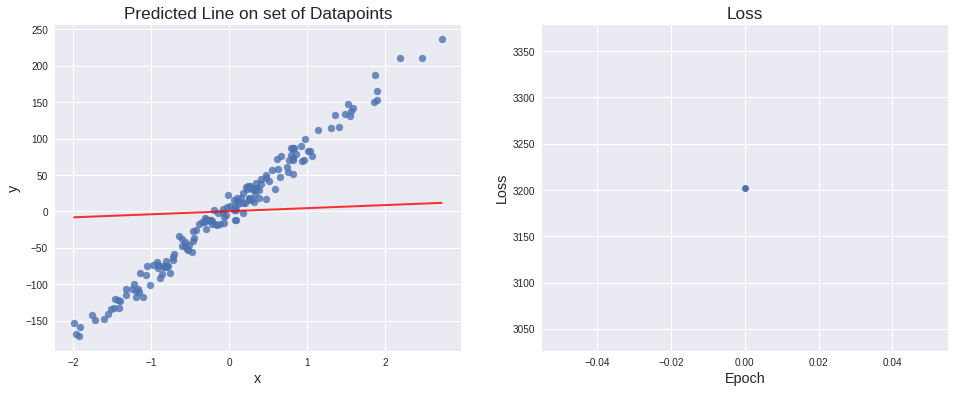

In [92]:
plot_pred_line(X_train, y_train, m, b,losses)

Now that we have computed the loss, let's minimize it.

## Gradient Descent for Linear Regression

Since, $Loss$ is the dependent variable and $m$ & $c$ are the independent variables, we'll have to update m & b so as to find the minimum Loss.

So the next question would be, How can I update the parameters $m$ and $b$?


Let us for instance consider just a single parameter $p$ as shown below and let $t(target)$ be the actual value that has to be predicted.. We see that as $cost$ converges to the minima, the parameter $p$ reaches an optimum value for the minimum $cost$. Let's say the optimum value of $p$ is $a$.

>> <img src="https://cdn-images-1.medium.com/max/1600/1*pwPIG-GWHyaPVMVGG5OhAQ.gif" alt="Drawing" width="800"/>

Let's gain a bit of intuition as to what the graph is saying.

It is clear from the graph, that as $p$ moves towards $a$, the Cost decreases and as it moves away from it, the cost increase.

<br>
**Now, how can we make $p$ move towards $a$, whether it is on the left or to the right of $a$ as shown in figure?**

Let us consider the $slope$ of the curve. From calculus, we know that the $slope$ of a curve at a point is given by $\frac{\mathrm dy}{\mathrm dx}$(here it is $\frac{\mathrm dL}{\mathrm dp}$ where $L \rightarrow Loss$). From the fig., when $p$ is to the right of $a$, the $slope$ is obviously $-ve$ and when it's to the right, the $slope$ would be $+ve$. But we see that if $p$ is to the left of $a$, some value must be added to $p$. Likewise, some value must subtracted when $p$ is to the right of $a$.

This means that when $slope \rightarrow -ve \implies p = p + (some \space val.)$ and when $slope \rightarrow +ve \implies p = p - (some \space val.)$ to move towards $a$

$\therefore$ We subtract $slope$ itself to $p$. This way, slope is negated so that it could be appropriately added or subtracted.The resulting equation would be, 

\begin{equation}
p = p - slope \\
= p - \dfrac{\mathrm dL}{\mathrm dp} \\
\implies p = p - \mathrm dp \qquad \qquad
\end{equation}

It must also be observed that if the cost is too high, the $slope$ will be too high. Hence, while subtracting the $slope$ from $p$, $p$ value might overshoot $a$. It implies that it is necessary to decrease the value of $slope$ so that $p$ does not overshoot $a$. Therefore, we introduce a dampening factor called $Learning \space Rate (\alpha)$ to the $slope$.

What we finally obtain would be,
\begin{equation}
p = p - \alpha .\mathrm dp \qquad \qquad
\end{equation}

A shown in the figure, the trajectory taken by $p$ against $Cost$ is that of a Bel curve.

This method is called the **Gradient Descent**.

In our case, we use two parameters $m$ and $b$. Therefore, the bel curve would be *3-dimensional* as shown in the below figure.
>>>> <img src="https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif" alt="Drawing" width="700"/>

We compute the partial derivative of the loss function w.r.t to the parameters $m$ & $b$ i.e.,

\begin{equation}
\frac{\partial L}{\partial m} = \partial{m} = \frac{1}{M}.\sum_{i=0}^M\Big(y'^{(i)} - y^{(i)}\Big).x^{(i)}\qquad--(1)
\end{equation}

<br>
\begin{equation}
\& \qquad \qquad \qquad
\end{equation}
<br>

\begin{equation}
\quad \frac{\partial L}{\partial b} = \partial{b} = \frac{1}{M}.\sum_{i=0}^M\Big(y'^{(i)} - y^{(i)}\Big)\qquad\qquad--(2)
\end{equation}

In [0]:
def grad_desc(m, b, X_train, y_train, y_pred):
    dm = np.mean((y_pred - y_train) * X_train)
    db = np.mean(y_pred - y_train)
    
    return dm, db

### Updating the parameters

\begin{equation}
\qquad m = m - \alpha . \partial{m} \qquad\qquad\qquad\qquad--(3)\\
\qquad\space\space b = b - \alpha . \partial{b} \qquad\qquad\qquad\qquad\quad--(4)
\end{equation}

In [0]:
def update_params(m, b, dm, db, l_r):
    
    m -= l_r * dm
    b -= l_r * db
    
    return m, b

Let us define a function ```back_prop```, which calls both ```grad_desc``` and ```update_params```.

In [0]:
def back_prop(X_train, y_train, y_pred, m, b, l_r):

    dm, db = grad_desc(m, b, X_train, y_train, y_pred)
    
    m, b = update_params(m, b, dm, db, l_r)

    return m, b

We shall now combine and call all the functions at once to see how the algorithm works.

We shall again set and tune the parameters to improve the accuracy of our linear regression model.

In [0]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 61

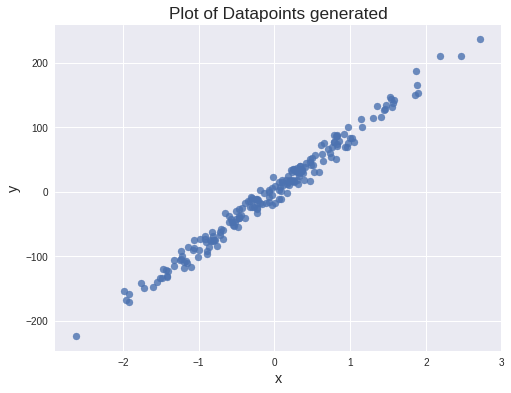

Epoch:  0
Loss =  2934.082243250548


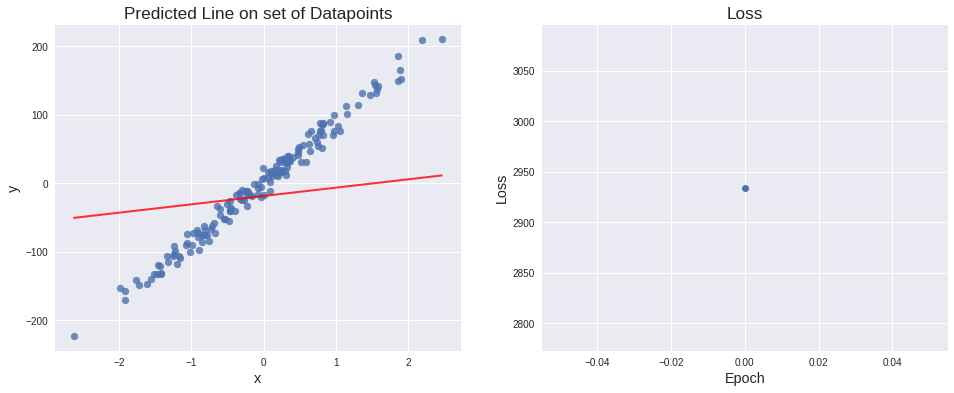

Epoch:  10
Loss =  1246.3617292447889


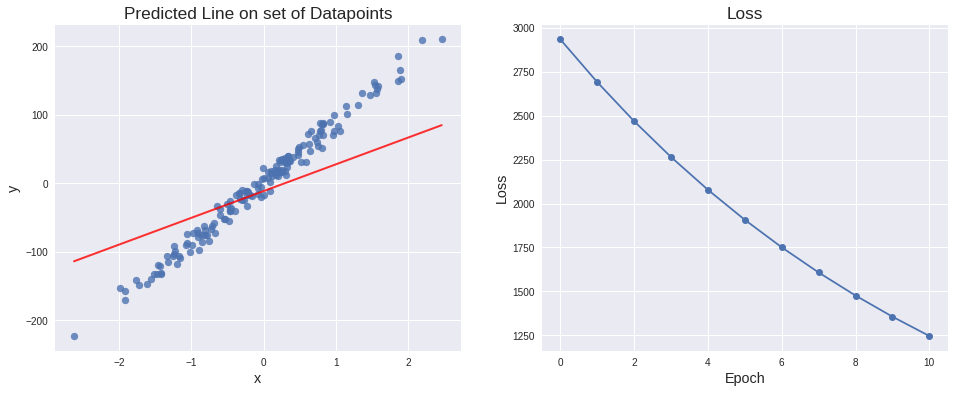

Epoch:  20
Loss =  546.310951004311


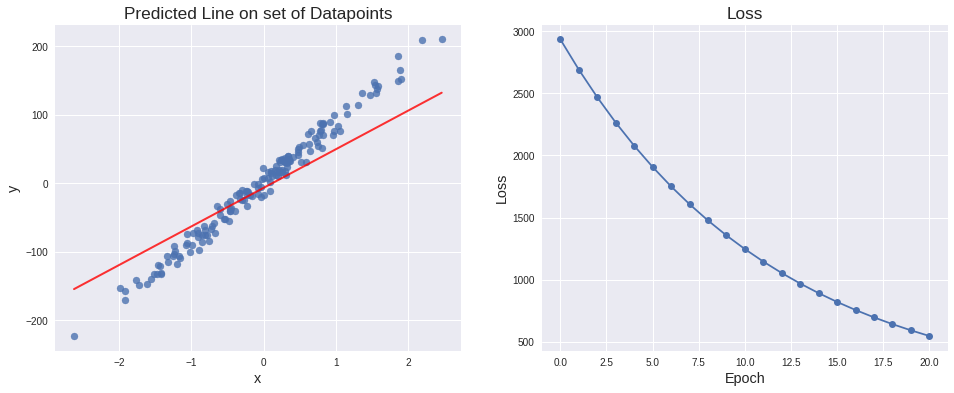

Epoch:  30
Loss =  255.88020867147344


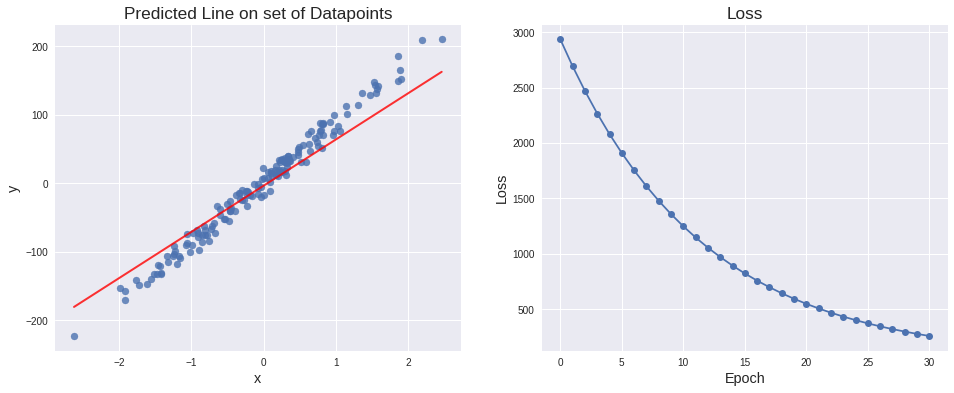

Epoch:  40
Loss =  135.36914932067438


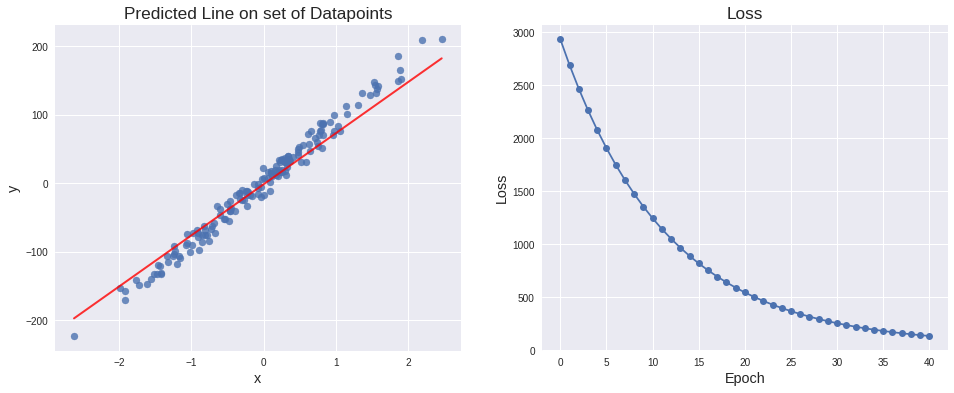

Epoch:  50
Loss =  85.35744394597806


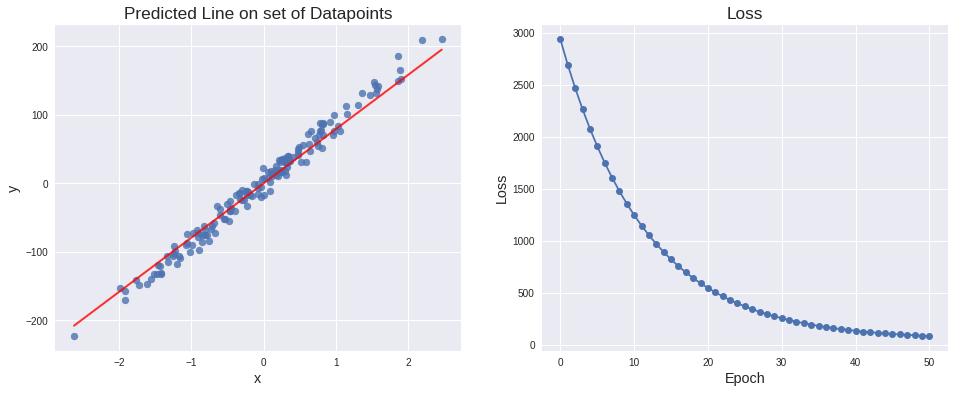

Epoch:  60
Loss =  64.60029693013243


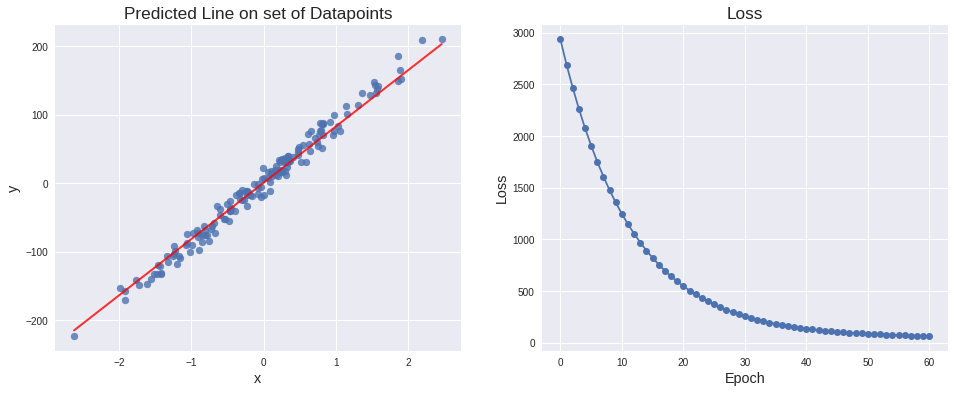

Prediction: 
Loss =  56.53060443946197
Accuracy = 80.1676%


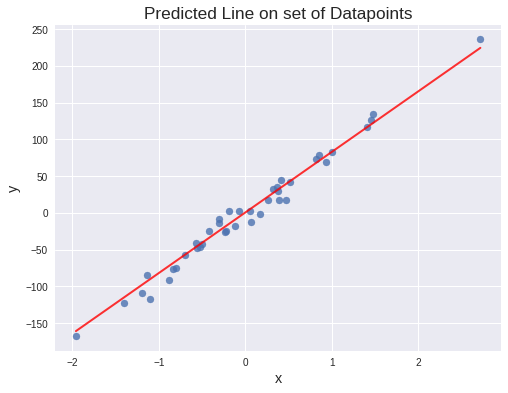

Hence 
m =  82.34083095217943
b =  0.46491578390750576


In [101]:
X, y = make_regression(n_samples=M, n_features=n, n_informative=n, 
                         n_targets=1, random_state=42, noise=10)

dataset = {'X': X, 'y': y}

plot_graph(dataset)

m, b = init_params()

X, y = reset_sizes(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

losses = []

for i in range(epochs):
    y_pred = forward_prop(X_train, m, b)

    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    m, b = back_prop(X_train, y_train, y_pred, m, b, l_r)

    if(i%10==0):
        print('Epoch: ', i)
        print('Loss = ', loss)
        plot_pred_line(X_train, y_train, m, b, losses)

del losses[:]

## Prediction

Prediction: 
Loss =  56.53060443946197
Accuracy = 80.1676%


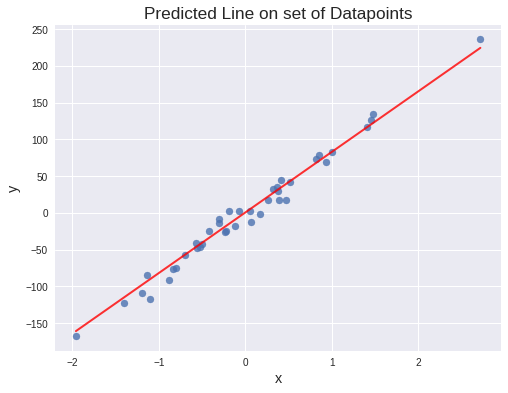

Hence 
m =  82.34083095217943
b =  0.46491578390750576


In [102]:
# Prediction
print('Prediction: ')
y_pred = forward_prop(X_test, m, b)
loss = compute_loss(y_test, y_pred)
print('Loss = ', loss)
accuracy = np.mean(np.fabs((y_pred - y_test) / y_test)) * 100
print('Accuracy = {}%'.format(round(accuracy, 4)))
plot_pred_line(X_test, y_test, m, b)

print('Hence \nm = ', m)
print('b = ', b)

## Two Layer Neural Neutwork with Linear Activation Function

Now, let us consider scaling this up to a 2 layer network as shown in the below figure.
>>>>> <img src="https://docs.google.com/drawings/d/e/2PACX-1vQGsJESLwUjPIqrxaK4tZBsOBNuSQbzl0RKd0vL3nV8-QEf8rbP6ZqbKTszCUxdgvzcCSgl6WTQikSu/pub?w=3649&h=2880" alt="two layer network with Linear Activation Function." width="600"/>

From the image, we observe that there are two inputs each to the two neurons in the first layer and an output neuron in the second layer.

We can represent them in vector form as:
\begin{equation}
z_1^{[1]} = x.w_1^{[1]} \\ =
\begin{bmatrix}
x_0 &
x_1 &
x_2
\end{bmatrix} .
\begin{bmatrix}
w_{10}^{[1]} \\
w_{11}^{[1]} \\
w_{12}^{[1]}
\end{bmatrix}\\ 
= w_{10}^{[1]} + w_{11}^{[1]}.x_1 + w_{12}^{[1]}.x_2, \\
\end{equation}

While doing matrix computations, we'll need to take care of the dimensions and multiply. Hence, we rearrange a bit to arrive at the required output.

<br>
The expansion of the equation is not required and hence let's stick to 

\begin{equation}z_1^{[1]} = x.w_1^{[1]}\end{equation}

Similarly, the value of 

\begin{equation}
z_2^{[1]} =  x.w_2^{[1]}
\end{equation}

\begin{equation}
\therefore z^{[1]}  =
\begin{bmatrix}
z_1^{[1]} &
z_2^{[1]}
\end{bmatrix}
\end{equation}

<br>
Now the ouput from the $2^{nd}$ layer will be:
\begin{equation}
z^{[2]} =  z^{[1]}.w^{[2]} = w_{0}^{[2]} + w_{1}^{[2]}.z_1^{[1]} + w_{2}^{[2]}.z_2^{[1]} \\
= w_{0}^{[2]} + w_{1}^{[2]}.(x.w_1^{[1]}) + w_{2}^{[2]}.(x.w_2^{[1]}) \\
\implies z^{[2]} = w_0' + w_1'.x \qquad \text{[where, } w_0' \space \& \space w_1' \text{are some values]}
\end{equation}

<br><br>
From the above set of equations, we see that a neural network with a linear activation function reduces to a *linear equation*. This defeats the purpose of the whole neural network which tries to approximate to complex curves in space, so as to find the optimal solution. **Hence, it should be strictly noted that a linear function cannot be used as an activation function for the neural network,** *although it can be used only in the last layer for regression problems*.

### Conclusion

In this tutorial, we learnt
1. the concept of  perceptron and also neural networks.

2. that Linear Activation functions perform the taks of regression i.e., learn to predict and forecast values. This method is extensively called *Linear Regression* everywhere.

2. that an MLP(Multi-Layer Perceptron) with a linear activation function reduces to a normal Linear Regression task. Hence, linear activations must not be used in the hiiden layers of a network. However, it can be used in the last layer for regression/prediction tasks.

In the next tutorial, you'll learn about Sigmoid Activation Function and perform Logistic Regression.